In [95]:
import sys
sys.path.append('../')

import loaders

from loaders import vim2

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

In [20]:
dataset = vim2.Vim2('/mnt/e/data_derived/crcns-vim2', 
                    split='report',
                    subject='s1')

ys = []
for _, data in dataset:
    ys.append(data)

In [21]:
Y = np.concatenate(ys, axis=0)

In [29]:
max_r2 = dataset.max_r2[dataset.mask]

0.22253156969119436

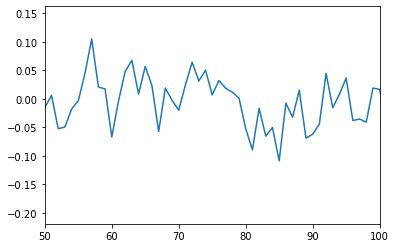

In [42]:

plt.plot(Y[:, 10])
plt.xlim([50, 100])
max_r2[0]

In [67]:
roi_str = np.zeros(dataset.mask.shape, dtype=np.object)
for key, val in dataset.rois.items():
    roi_str[(val > 0).ravel()] = key
rois = roi_str[dataset.mask]

(array([ 169,  181,  182,  183,  189,  190,  195,  196,  439,  464,  465,
         487,  509,  510,  529,  530,  544,  545,  546,  553,  554,  555,
         559,  560,  829,  830,  863,  864,  865,  899,  900,  901,  931,
         932,  957,  958,  959,  977,  978,  979,  993,  994,  995,  996,
        1003, 1004, 1334, 1335, 1366, 1367, 1399, 1400, 1432, 1433, 1458,
        1459, 1482, 1483, 1500, 1501, 1502, 1516, 1517, 1524, 1525, 1887,
        1922, 1923, 1961, 1962, 1996, 1997, 1998, 2029, 2030, 2031, 2055,
        2056, 2057, 2075, 2076, 2077, 2078, 2079, 2095, 2096, 2097, 2098,
        2115, 2539, 2540, 2571, 2572, 2602, 2603, 2604, 2635, 2636, 2637,
        2662, 2663, 2664, 2665, 2666, 2681, 2682, 2683, 2684, 2685, 2686,
        2696, 2697, 2698, 2699, 2720, 2744, 2745, 3211, 3237, 3238, 3239,
        3266, 3267, 3268, 3292, 3293, 3294, 3295, 3314, 3315, 3316, 3317,
        3318, 3319, 3320, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339,
        3359, 3360, 3361, 3362, 3363, 

In [89]:
max_r2

array([ 0.22253157,  0.22434479,  0.11475756, ...,  0.01324488,
        0.09866869, -0.11069902])

In [123]:
target = 'v1'
valid_rois = (max_r2 >= .04) & ((rois == f"{target}lh") | (rois == f"{target}rh"))
valid_rois.sum()

Y_ = Y[:, valid_rois]
Y_ = Y_ - Y_.mean(axis=0, keepdims=True)

A = scipy.signal.fftconvolve(Y_, Y_[::-1, :], axes=0)

(0.0, 20.0)

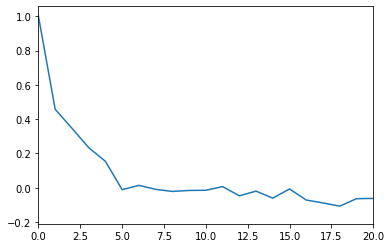

In [265]:
plt.plot(np.arange(540), A[539:, 3])
plt.xlim([0, 20])

In [288]:
sm.param_names

['ar.L1', 'var.measurement_error', 'sigma2']

<ipython-input-311-b12608fa32b9>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, [idx]], np.ones((Y_.shape[0] - 1, 1))], axis=1), Y_[1:, [idx]])


4.796029055206888

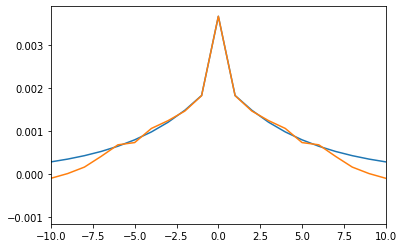

In [311]:
import statsmodels
import statsmodels.tsa.statespace.sarimax

idx = 7

sm = statsmodels.tsa.statespace.sarimax.SARIMAX(Y_[:, idx], measurement_error=True)
results = sm.fit()
results

results.params

params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, [idx]], np.ones((Y_.shape[0] - 1, 1))], axis=1), Y_[1:, [idx]])
#print(params[0])
params = results.params

x = np.arange(-40, 41)
autocorr = params[2] / (1 - params[0]**2) * params[0] ** abs(x)
autocorr[x==0] += params[1]

plt.plot(x, autocorr)

y_autocorr = np.correlate(Y_[:, idx], Y_[:, idx], 'full')
plt.plot(np.arange(-539, 540), y_autocorr / Y.shape[0])
plt.xlim((-10, 10))

# print(params)
tau = -1 / np.log(params[0])
tau

In [280]:
sm.param_names

['ar.L1', 'var.measurement_error', 'sigma2']

In [ ]:
def fit_exponential(x, y):
    x * 

'v1rh'

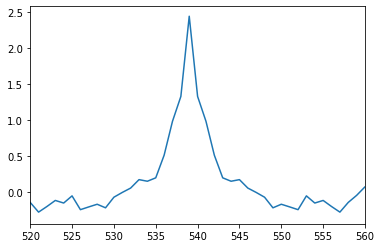

In [127]:
idx = 151
my = Y[:, idx]
my = my - my.mean()
plt.plot(np.correlate(my, my, 'full'))
plt.xlim([-20+540, 20+540])
rois[idx]

In [44]:
?np.correlate

Signature: np.correlate(a, v, mode='valid')
Docstring:
Cross-correlation of two 1-dimensional sequences.

This function computes the correlation as generally defined in signal
processing texts::

    c_{av}[k] = sum_n a[n+k] * conj(v[n])

with a and v sequences being zero-padded where necessary and conj being
the conjugate.

Parameters
----------
a, v : array_like
    Input sequences.
mode : {'valid', 'same', 'full'}, optional
    Refer to the `convolve` docstring.  Note that the default
    is 'valid', unlike `convolve`, which uses 'full'.
old_behavior : bool
    `old_behavior` was removed in NumPy 1.10. If you need the old
    behavior, use `multiarray.correlate`.

Returns
-------
out : ndarray
    Discrete cross-correlation of `a` and `v`.

See Also
--------
convolve : Discrete, linear convolution of two one-dimensional sequences.
multiarray.correlate : Old, no conjugate, version of correlate.

Notes
-----
The definition of correlation above is not unique and sometimes correlation
m

(-50.0, 50.0)

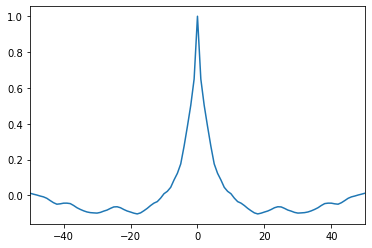

In [134]:
A = A / A.max(axis=0, keepdims=True)

plt.plot(np.arange(-539, 540), A.mean(axis=1))
plt.xlim((-50, 50))

[0.7068129]


<ipython-input-174-269238991b80>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, [idx]], np.ones((Y_.shape[0] - 1, 1))], axis=1), Y_[1:, [idx]])


(-10.0, 10.0)

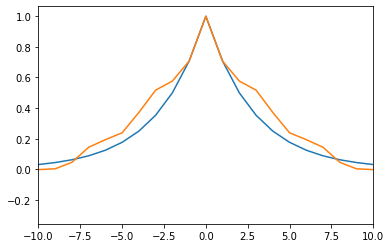

In [174]:
idx = 11

params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, [idx]], np.ones((Y_.shape[0] - 1, 1))], axis=1), Y_[1:, [idx]])
print(params[0])

x = np.arange(-40, 41)
autocorr = params[0] ** abs(x)

plt.plot(x, autocorr)

y_autocorr = np.correlate(Y_[:, idx], Y_[:, idx], 'full')
plt.plot(np.arange(-539, 540), y_autocorr / max(y_autocorr))
plt.xlim((-10, 10))

In [196]:
targets = ['v1', 'v2', 'v3', 'v3a', 'v3b', 'MT', 'MTp']

for target in targets:
    valid_rois = (max_r2 >= .04) & ((rois == f"{target}lh") | (rois == f"{target}rh"))
    print(valid_rois.sum())

    Y_ = Y[:, valid_rois]
    Y_ = Y_ - Y_.mean(axis=0, keepdims=True)

    params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, :].ravel().reshape((-1, 1)), 
                                                       np.ones(((Y_.shape[0] - 1) * Y_.shape[1], 1))], axis=1), 
                                       Y_[1:, :].ravel())

    tau = -1/np.log(params[0])
    print(target, params[0], tau)

971
v1 0.7861740783618592 4.156672686183398
1395
v2 0.7108386109331102 2.929888954582992
1058
v3 0.6925081896082883 2.7215682101444436
243
v3a 0.8000230378892619 4.481998525090382
245
v3b 0.6908408032287611 2.703829046101161
282
MT 0.5769009991868483 1.817902172843423
135
MTp 0.5072197113979392 1.4731640768769274


<ipython-input-196-cacac9ea8a01>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, :].ravel().reshape((-1, 1)),


[0.48704663]


<ipython-input-195-483a8588b336>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, [idx]], np.ones((Y_.shape[0] - 1, 1))], axis=1), Y_[1:, [idx]])


(-10.0, 10.0)

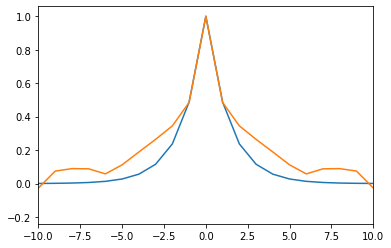

In [195]:
idx = 3

params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, [idx]], np.ones((Y_.shape[0] - 1, 1))], axis=1), Y_[1:, [idx]])
print(params[0])

x = np.arange(-40, 41)
autocorr = params[0] ** abs(x)

plt.plot(x, autocorr)

y_autocorr = np.correlate(Y_[:, idx], Y_[:, idx], 'full')
plt.plot(np.arange(-539, 540), y_autocorr / max(y_autocorr))
plt.xlim((-10, 10))

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 70 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     6.5759, 87.2219, 2.0354                                      
                                                                                                  
                                       2 peaks were found:                                        
          

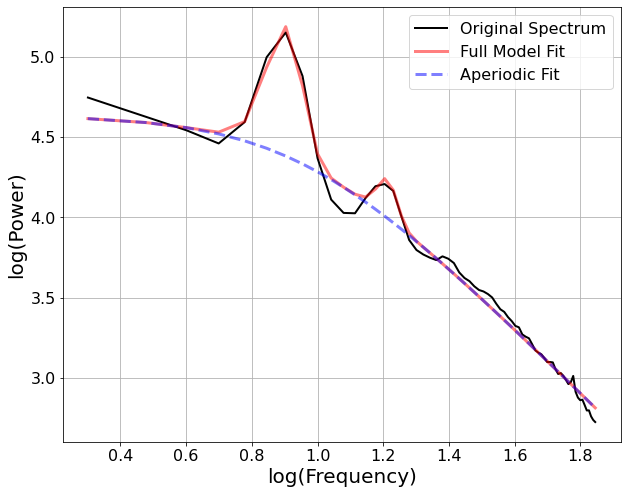

In [197]:
import fooof

from fooof import FOOOF

from fooof.utils.download import load_fooof_data

freqs = load_fooof_data('freqs_lfp.npy', folder='data')
spectrum = load_fooof_data('spectrum_lfp.npy', folder='data')

fm = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')
fm.report(freqs, spectrum, [2, 70], plt_log=True)

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 0 - 1 Hz                         
                                 Frequency Resolution is 0.01 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     -3.0105, 0.0070, 0.8816                                      
                                                                                                  
                                       0 peaks were found:                                        
          

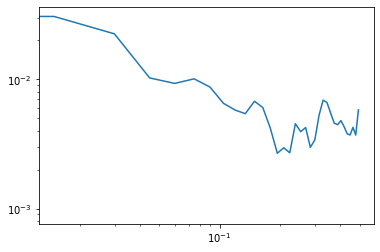

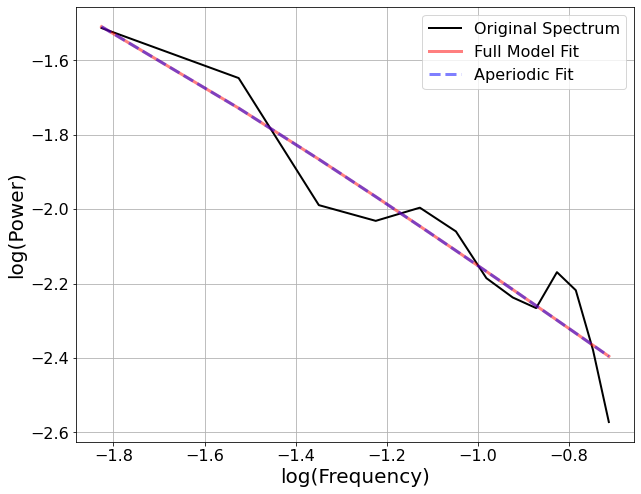

In [253]:
import mne
from mne.time_frequency import psd_welch

f, Pxx = scipy.signal.welch(Y_[:, 6], 1.0, nperseg=540//8)

#spectra, freqs = psd_welch(Y_[:, 0], fmin=1, fmax=40, tmin=0, tmax=250,
#                           n_overlap=150, n_fft=300)
plt.loglog(f, Pxx)

fm = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee', )
fm.report(f, Pxx, [0.01, .2], plt_log=True)

In [236]:
%debug

> /home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/fooof/objs/fit.py(1173)_prepare_data()
   1171         # Check if freqs start at 0 and move up one value if so
   1172         #   Aperiodic fit gets an inf if freq of 0 is included, which leads to an error
-> 1173         if freqs[0] == 0.0:
   1174             freqs, power_spectrum = trim_spectrum(freqs, power_spectrum, [freqs[1], freqs.max()])
   1175             if verbose:



ipdb>  freqs


array([], dtype=float64)


ipdb>  u


> /home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/fooof/objs/fit.py(314)add_data()
    312 
    313         self.freqs, self.power_spectrum, self.freq_range, self.freq_res = \
--> 314             self._prepare_data(freqs, power_spectrum, freq_range, 1, self.verbose)
    315 
    316 



ipdb>  freqs


array([0.        , 0.01492537, 0.02985075, 0.04477612, 0.05970149,
       0.07462687, 0.08955224, 0.10447761, 0.11940299, 0.13432836,
       0.14925373, 0.1641791 , 0.17910448, 0.19402985, 0.20895522,
       0.2238806 , 0.23880597, 0.25373134, 0.26865672, 0.28358209,
       0.29850746, 0.31343284, 0.32835821, 0.34328358, 0.35820896,
       0.37313433, 0.3880597 , 0.40298507, 0.41791045, 0.43283582,
       0.44776119, 0.46268657, 0.47761194, 0.49253731])
--KeyboardInterrupt--


ipdb>  q


In [337]:
import statsmodels
import statsmodels.tsa.statespace.sarimax
from tqdm import tqdm

tau = -1 / np.log(params[0])
tau

targets = ['v1', 'v2', 'v3', 'v3a', 'v3b', 'MT', 'MTp']

all_results = []
for target in targets:
    valid_rois = (max_r2 >= .04) & ((rois == f"{target}lh") | (rois == f"{target}rh"))
    print(valid_rois.sum())
    max_r2_ = max_r2[valid_rois]

    Y_ = Y[:, valid_rois]
    Y_ = Y_ - Y_.mean(axis=0, keepdims=True)

    for idx in tqdm(range(Y_.shape[1])):
        sm = statsmodels.tsa.statespace.sarimax.SARIMAX(Y_[:, idx], measurement_error=True)
        results = sm.fit()
        
        if not results.mle_retvals['converged']:
            tau = np.nan
        else:
            tau = -1/np.log(results.params[0])
        
        all_results.append({'area': target, 
                            'voxel': idx, 
                            'tau': tau, 
                            'max_r2': max_r2_[idx]})
        

  0%|          | 0/971 [00:00<?, ?it/s]

971


  1%|          | 6/971 [00:01<05:24,  2.98it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  6%|▌         | 56/971 [00:19<06:04,  2.51it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 11%|█▏        | 110/971 [00:31<03:08,  4.57it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 19%|█▉        | 185/971 [00:52<03:17,  3.98it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566

1395


  1%|▏         | 19/1395 [00:09<12:03,  1.90it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  2%|▏         | 22/1395 [00:10<11:46,  1.94it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  8%|▊         | 113/1395 [00:37<07:14,  2.95it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  8%|▊         | 118/1395 [00:38<04:28,  4.75it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.p

1058


  2%|▏         | 18/1058 [00:05<05:44,  3.02it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  5%|▍         | 51/1058 [00:15<05:09,  3.25it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  8%|▊         | 82/1058 [00:24<05:25,  2.99it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  9%|▉         | 100/1058 [00:29<04:09,  3.84it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py

243


  5%|▍         | 11/243 [00:02<00:47,  4.92it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 16%|█▌        | 39/243 [00:07<00:38,  5.34it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 40%|███▉      | 97/243 [00:22<00:41,  3.56it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 56%|█████▌    | 136/243 [00:31<00:21,  4.97it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566

245


 30%|███       | 74/245 [00:25<00:41,  4.14it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 66%|██████▌   | 162/245 [00:49<00:22,  3.68it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 79%|███████▉  | 193/245 [00:58<00:18,  2.76it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 84%|████████▍ | 207/245 [01:04<00:13,  2.88it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:5

282


  6%|▋         | 18/282 [00:08<02:09,  2.03it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  8%|▊         | 22/282 [00:10<02:05,  2.07it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 19%|█▉        | 53/282 [00:24<01:52,  2.04it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 19%|█▉        | 54/282 [00:25<02:01,  1.87it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566:

135


  9%|▉         | 12/135 [00:05<00:46,  2.67it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 12%|█▏        | 16/135 [00:06<00:37,  3.14it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 19%|█▊        | 25/135 [00:09<00:34,  3.17it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 24%|██▍       | 33/135 [00:12<00:34,  2.99it/s]/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/statsmodels/base/model.py:566:

In [340]:
import pandas as pd

pd.DataFrame(all_results).groupby('area').mean()

,voxel,tau,max_r2
area,,,
MT,140.5,4.251605,0.380605
MTp,67.0,4.117991,0.344761
v1,485.0,4.842133,0.608123
v2,697.0,4.955574,0.497914
v3,528.5,4.756432,0.478077
v3a,121.0,5.653538,0.596781
v3b,122.0,4.878361,0.501059


<ipython-input-336-9e9656fde013>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, [idx]], np.ones((Y_.shape[0] - 1, 1))], axis=1), Y_[1:, [idx]])


2.6614227897573564

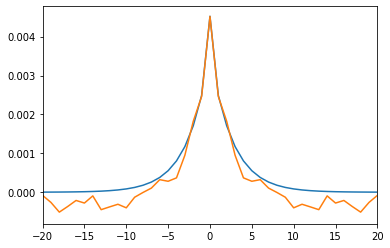

In [336]:
import statsmodels
import statsmodels.tsa.statespace.sarimax

idx = 0

sm = statsmodels.tsa.statespace.sarimax.SARIMAX(Y_[:, idx], measurement_error=True)
results = sm.fit(maxiter=100)
results

results.params

params, _, _, _, = np.linalg.lstsq(np.concatenate([Y_[:-1, [idx]], np.ones((Y_.shape[0] - 1, 1))], axis=1), Y_[1:, [idx]])
#print(params[0])
params = results.params

x = np.arange(-40, 41)
autocorr = params[2] / (1 - params[0]**2) * params[0] ** abs(x)
autocorr[x==0] += params[1]

plt.plot(x, autocorr)

y_autocorr = np.correlate(Y_[:, idx], Y_[:, idx], 'full')
plt.plot(np.arange(-539, 540), y_autocorr / Y.shape[0])
plt.xlim((-20, 20))

# print(params)
tau = -1 / np.log(params[0])
tau